In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [2]:
#データを取得
df23_1s = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset23.csv")
#df23_2s = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset23.csv")
df23_3s = pd.read_csv("./取得データセット/受信機3/nkmr3-dataset23.csv")
df23_4s = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset23.csv")

#それぞれのカラムを設定
df23_1s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
#df23_2s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df23_3s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df23_4s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_s = df23_1s.append(df23_3s).append(df23_4s)

#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"
id10 = "a0000000aaaa41441111110000000000"
id_list = [id1,id2,id3,id4,id5,id6,id7,id8,id9,id10]

#locateを作成
df_s["locate"] = 0
for i,w in enumerate(id_list):
    df_s.locate = df_s.locate.where(df_s.UUIDs != w,i+1)
df_s.locate = df_s.locate.astype(int)

#deviceを作成
df_s["device"] = 0
df_s.device = df_s.device.where(df_s.device_name != "rasp1",1)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-2",2)
df_s.device = df_s.device.where(df_s.device_name != "rasp3",3)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-4",4)

#座標を与える
df_s["x"] = 0
df_s["y"] = 0
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id1,250),df_s.y.where(df_s.UUIDs != id1,750)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id2,750),df_s.y.where(df_s.UUIDs != id2,750)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id3,250),df_s.y.where(df_s.UUIDs != id3,250)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id4,750),df_s.y.where(df_s.UUIDs != id4,250)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id5,500),df_s.y.where(df_s.UUIDs != id5,500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id6,350),df_s.y.where(df_s.UUIDs != id6,100)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id7,500),df_s.y.where(df_s.UUIDs != id7,250)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id8,750),df_s.y.where(df_s.UUIDs != id8,250)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id9,350),df_s.y.where(df_s.UUIDs != id9,750)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id10,250),df_s.y.where(df_s.UUIDs != id10,1000)

#発信機ごとに分ける
df_1 = df_s[(df_s.UUIDs == id1) | (df_s.UUIDs == set_uuid)]
df_2 = df_s[(df_s.UUIDs == id2) | (df_s.UUIDs == set_uuid)]
df_3 = df_s[(df_s.UUIDs == id3) | (df_s.UUIDs == set_uuid)]
df_4 = df_s[(df_s.UUIDs == id4) | (df_s.UUIDs == set_uuid)]
df_5 = df_s[(df_s.UUIDs == id5) | (df_s.UUIDs == set_uuid)]
df_6 = df_s[(df_s.UUIDs == id6) | (df_s.UUIDs == set_uuid)]
df_7 = df_s[(df_s.UUIDs == id7) | (df_s.UUIDs == set_uuid)]
df_8 = df_s[(df_s.UUIDs == id8) | (df_s.UUIDs == set_uuid)]
df_9 = df_s[(df_s.UUIDs == id9) | (df_s.UUIDs == set_uuid)]
df_10 = df_s[(df_s.UUIDs == id10) | (df_s.UUIDs == set_uuid)]

df_list = [#df_1,
           df_2,
           df_3,
           df_4,
           df_5,
           df_6,
           df_7,
           df_8,
           df_9,
           df_10
          ]

(0, 1100)

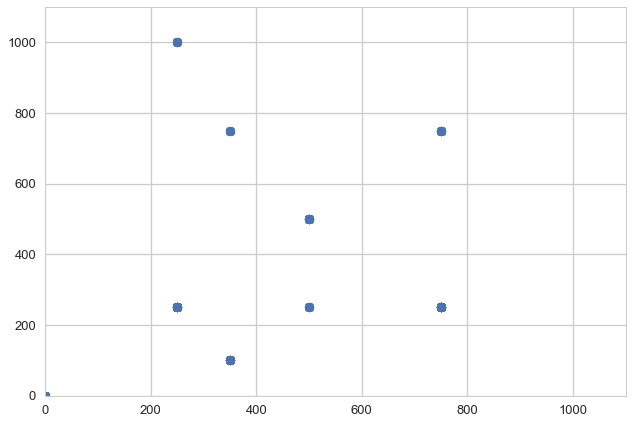

In [3]:
plt.plot(np.array(df_s.x.head(300)),np.array(df_s.y.head(300)),"o")
plt.xlim(0,1100)
plt.ylim(0,1100)

point2の平均値:-70.86472937377857
point3の平均値:-72.66952234704598

point4の平均値:-70.7355515120007
point5の平均値:-72.16893392559689
point6の平均値:-71.16002460865404
point7の平均値:-65.14148253741982

point8の平均値:-70.59210160378233
point9の平均値:-68.06674266763395
point10の平均値:-71.59308488950502


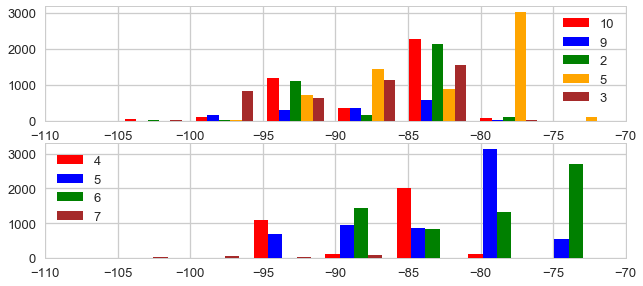

In [4]:
#fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,7))

plt.subplot(3,1,1)
labels=["10","9","2","5","3"]
colors=["red","blue","green","orange","brown"]
x1 = [df_list[8][(df_list[8].device == 1)&(df_list[8].locate == 10)]["RSSI"],\
      df_list[7][(df_list[7].device == 1)&(df_list[7].locate == 9)]["RSSI"],\
      df_list[0][(df_list[0].device == 1)&(df_list[0].locate == 2)]["RSSI"],\
      df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
      df_list[1][(df_list[1].device == 1)&(df_list[1].locate == 3)]["RSSI"]]
plt.hist(x1,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

plt.subplot(3,1,2)
labels=["4","5","6","7"]
colors=["red","blue","green","brown"]
x2 = [df_list[2][(df_list[2].device == 1)&(df_list[2].locate == 4)]["RSSI"],\
      df_list[3][(df_list[3].device == 1)&(df_list[3].locate == 5)]["RSSI"],\
      df_list[4][(df_list[4].device == 1)&(df_list[4].locate == 6)]["RSSI"],\
      df_list[5][(df_list[5].device == 1)&(df_list[5].locate == 7)]["RSSI"]]
plt.hist(x2,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()

"""
plt.subplot(3,1,3)
labels=["8","9","10"]
colors=["red","blue","green"]
x3 = [df_list[6][df_list[6].device == 1]["RSSI"],df_list[7][df_list[7].device == 1]\
      ["RSSI"],df_list[8][df_list[8].device == 1]["RSSI"]]
plt.hist(x3,color=colors,bins=30,label=labels)
plt.xlim(-110,-70)
#plt.ylim(0,700)
plt.legend()
"""

print("point2の平均値:%s" % df_list[0][df_list[0].device == 1].RSSI.mean())
print("point3の平均値:%s\n" % df_list[1][df_list[1].device == 1].RSSI.mean())
print("point4の平均値:%s" % df_list[2][df_list[2].device == 1].RSSI.mean())
print("point5の平均値:%s" % df_list[3][df_list[3].device == 1].RSSI.mean())
print("point6の平均値:%s" % df_list[4][df_list[4].device == 1].RSSI.mean())
print("point7の平均値:%s\n" % df_list[5][df_list[5].device == 1].RSSI.mean())
print("point8の平均値:%s" % df_list[6][df_list[6].device == 1].RSSI.mean())
print("point9の平均値:%s" % df_list[7][df_list[7].device == 1].RSSI.mean())
print("point10の平均値:%s" % df_list[8][df_list[8].device == 1].RSSI.mean())

### 前処理用のモジュールの読み込み

In [3]:
import preprocessing as pre

### キャリブレーション用のデータ定義

In [6]:
# キャリブレーションデータを取得
cali_df = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_cali.csv")
# カラム付け
cali_df.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","CalRSSI","empty"]

#locateを作成
cali_df["locate"] = 0
for i,w in enumerate(id_list,1):
    cali_df.locate = cali_df.locate.where(cali_df.UUIDs != w,i)

cali_list = [cali_df[cali_df.UUIDs==uuid] for uuid in id_list]

### キャリブレーション用のデータの直接波と反射波の識別

In [7]:
#直接波と反射波の識別
cali_list = pre.make_cluster(cali_list,["RSSI","locate"])

In [8]:
cali_list2 = [cali_list[1][cali_list[1].cluster == 0].RSSI.mean()/\
              cali_list[i][cali_list[i].cluster == 0].RSSI.mean() for i in range(len(cali_list))]

In [9]:
for i in range(len(cali_list2)):
    cali_list2[i] = round(cali_list2[i],2)
cali_list2

[1.05, 1.0, 0.96, 0.98, 0.93, 0.96, 1.05, 1.0, 0.99, 1.04]

### 時刻合わせ

In [4]:
#時刻合わせ
for (i,df) in enumerate(df_list):
    df_list[i] = pre.set_time(df,set_uuid)

### 直接波と反射波の識別

In [5]:
#直接波と反射波の識別
df_list = pre.make_cluster(df_list,["RSSI","locate"])

### 時刻毎にRSSIの平均値を生成する

In [6]:
#時刻毎のRSSIの平均値を格納
train_df = pd.DataFrame()
column_name = ["dev1","dev3","dev4","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","x","y","cluster"]
time_max = pre.max_value(df_list)

for df in df_list:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = pre.get_mean(df,column_name,locate,x,y,time_max)
    train_df = pd.concat([train_df,mid_df])

In [13]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df[train_df.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df[train_df.cluster == 1].dropna(thresh=4).interpolate().dropna()
train = pd.concat([direct,reflect])
train.locate = train.locate.astype("int")
train.time = train.time.astype("int")
train.x = train.x.astype("int")
train.y = train.y.astype("int")
train.cluster = train.cluster.astype("int")

### 近い地点を設定

In [14]:
train["near_locate"] = 0
train["near_locate"] = train.near_locate.where(train.locate != 5,9)
train["near_locate"] = train.near_locate.where(train.locate != 6,3)
train["near_locate"] = train.near_locate.where(train.locate != 7,3)
train["near_locate"] = train.near_locate.where(train.locate != 8,4)
train["near_locate"] = train.near_locate.where(train.locate != 10,9)

### キャリブレーションしたデータセットを用意

In [15]:
train_cali = train.copy()
for i in range(1,len(cali_list2)):
    train_cali[["dev1","dev3","dev4"]] =\
    train_cali[["dev1","dev3","dev4"]].where(train_cali.locate != i+1,train[["dev1","dev3","dev4"]]*cali_list2[i])

In [16]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

ここまでは全て実行を行う。
以降は使用したいデータセットのパターンにより、実行箇所を変える。

### 学習用データセット1

In [72]:
#学習用とテスト用に分ける
train_s = train[(train.locate != 5) & (train.locate != 6) & (train.locate != 7) & (train.locate != 8) & (train.locate != 10)] 
test_s =  train[(train.locate == 5) | (train.locate == 6) | (train.locate == 7) | (train.locate == 8) | (train.locate == 10)]

### 学習データセット2

In [17]:
triain_s = test_s = train.sample(frac=1).reset_index(drop=True)
train_s = train_s.iloc[0:len(train)*3//4]
test_s = test_s.iloc[len(train)*3//4:len(train)]

### データセット(ラベルが座標)

In [49]:
from sklearn.utils import shuffle

# 学習用データセットを用意
train_x = np.array(train_s[["dev1","dev3","dev4","cluster"]])
train_y = np.array(train_s[["x","y"]])
train_x,train_y = shuffle(train_x,train_y)

test_x = np.array(test_s[["dev1","dev3","dev4","cluster"]])
test_y = np.array(test_s[["x","y"]])
test_x,test_y = shuffle(test_x,test_y)

# 教師データのx、yに分けたものを用意
train_y_x = np.array(train_s["x"])
test_y_x = np.array(test_s["x"])
train_y_y = np.array(train_s["y"])
test_y_y = np.array(test_s["y"])
train_y_x,train_y_y = shuffle(train_y_x,train_y_y)
test_y_x,test_y_y = shuffle(test_y_x,test_y_y)

### データセット(ラベルがlocate)

In [36]:
from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev3","dev4","cluster"]])
train_y = np.array(train_s[["locate"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev3","dev4","cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_y,test_y_2 = shuffle(test_x,test_y,test_y_2)

### 主成分分析

In [18]:
from sklearn.decomposition import PCA

In [73]:
from sklearn.utils import shuffle

train_x = np.array(train_s[["dev1","dev3","dev4"]])
train_x_2 = np.array(train_s[["cluster"]])
train_y = np.array(train_s[["locate"]])
train_x,train_x_2,train_y = shuffle(train_x,train_x_2,train_y)

test_x = np.array(test_s[["dev1","dev3","dev4"]])
test_x_2 = np.array(test_s[["cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_x_2,test_y,test_y_2 = shuffle(test_x,test_x_2,test_y,test_y_2)

#トレーニングデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(train_x)

transformed = pca.fit_transform(train_x)
transformed = np.concatenate((transformed,train_x_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(test_x)

test_x = pca.fit_transform(test_x)
test_x = np.concatenate((test_x,test_x_2), axis = 1) 

### xgboost(分類) キャリブレーションなし

In [74]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(transformed,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y),pd.DataFrame(test_y_2)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer","real_answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer] + hoge_c[hoge_c.real_answer == 5] + hoge_c[(hoge_c.real_answer == 7) & (hoge_c.answer == 4)]))/len(hoge_c)
print("総合精度:%s" % score)
hoge_c

総合精度:0.5505971769815418


,pred,answer,real_answer
0,3,4,8
1,9,3,7
2,3,3,7
3,3,3,6
4,9,3,7
5,9,4,8
6,4,9,10
7,9,3,7
8,3,3,7
9,3,3,7


### キャリブレーションしたデータセットを用意

In [68]:
#学習用とテスト用に分ける
train_s =\
train_cali[(train_cali.locate != 5) & (train_cali.locate != 6) & (train_cali.locate != 7) & (train_cali.locate != 8) & (train_cali.locate != 10)] 
test_s =\
train_cali[(train_cali.locate == 5) | (train_cali.locate == 6) | (train_cali.locate == 7) | (train_cali.locate == 8) | (train_cali.locate == 10)]

from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev3","dev4"]])
train_x_2 = np.array(train_s[["cluster"]])
train_y = np.array(train_s[["locate"]])
train_x,train_x_2,train_y = shuffle(train_x,train_x_2,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev3","dev4"]])
test_x_2 = np.array(test_s[["cluster"]])
test_y = np.array(test_s[["near_locate"]])
test_y_2 = np.array(test_s[["locate"]])
test_x,test_x_2,test_y,test_y_2 = shuffle(test_x,test_x_2,test_y,test_y_2)

In [69]:
#トレーニングデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(train_x)

transformed = pca.fit_transform(train_x)
transformed = np.concatenate((transformed,train_x_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(test_x)

test_x = pca.fit_transform(test_x)
test_x = np.concatenate((test_x,test_x_2), axis = 1) 

### 寄与率

In [46]:
pca.explained_variance_ratio_

array([ 0.93610999,  0.03698078,  0.02690924])

### 累積寄与率

In [47]:
sum(pca.explained_variance_ratio_)

1.0

### xgboost(分類) キャリブレーションあり

In [70]:
model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(transformed,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y),pd.DataFrame(test_y_2)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer","real_answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer] + hoge_c[hoge_c.real_answer == 5] + hoge_c[(hoge_c.real_answer == 7) & (hoge_c.answer == 4)]))/len(hoge_c)
print("総合精度:%s" % score)
hoge_c

総合精度:0.495656894679696


,pred,answer,real_answer
0,9,9,5
1,9,3,6
2,9,9,10
3,9,9,5
4,9,9,5
5,9,9,5
6,3,3,7
7,3,3,7
8,9,3,6
9,9,4,8


### ラベルを座標に切り替え、主成分分析を行う

In [42]:
# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev3","dev4"]])
train_x_2 = np.array(train_s[["cluster"]])
train_y = np.array(train_s[["x","y"]])
train_x,train_x_2,train_y = shuffle(train_x,train_x_2,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev3","dev4"]])
test_x_2 = np.array(test_s[["cluster"]])
test_y = np.array(test_s[["x","y"]])
test_x,test_x_2,test_y = shuffle(test_x,test_x_2,test_y)

#トレーニングデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(train_x)

transformed = pca.fit_transform(train_x)
transformed = np.concatenate((transformed,train_x_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(test_x)

test_x = pca.fit_transform(test_x)
test_x = np.concatenate((test_x,test_x_2), axis = 1) 

### カーネルリッジ

In [43]:
from sklearn.kernel_ridge import KernelRidge


model = KernelRidge(alpha=0.1, kernel='rbf')
reg = model.fit(transformed,train_y)

pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,76.554247,160.258198,500,250
1,-0.016158,0.267656,250,1000
2,0.011497,0.004048,250,1000
3,247.674296,247.559278,350,100
4,1.509641,2.971257,500,500
5,300.382035,310.337771,750,250
6,0.474272,0.561734,500,500
7,158.398099,339.171653,500,250
8,370.706572,370.970986,350,100
9,12.512636,12.816244,350,100


In [44]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:336.4416244958117
yの誤差の平均値:378.1473004861686
ユークリッド距離:506.150518678


### 5mのデータセットを用意

In [22]:
#学習用とテスト用に分ける
#train_s = train[train.locate == 3]
#test_s =  new_test_x[new_test_x.real_answer == 6]
train_s2 = pd.read_csv("reg_csv.csv")
train_s2 = train_s2.drop(["Unnamed: 0","dev2"],axis=1)
#test_s = new_test_x

In [66]:
len(test_x)

9210

### 上記のデータの改良
今回はlocate 3を合成する

### 5mのデータセットをlocate3のサイズに合わせる

In [23]:
for i in train_s2.locate.unique():
    #直接波
    train_s2[(train_s2.locate == i)&(train_s2.cluster == 0)] = \
    train_s2[(train_s2.locate == i)&(train_s2.cluster == 0)].sample(frac=1).iloc[0:len(train_s[(train_s.locate == 3)&(train_s.cluster == 0)])]
    print(len(train_s2[(train_s2.locate == i)&(train_s2.cluster == 0)]))
    
    #反射波
    train_s2[(train_s2.locate == i)&(train_s2.cluster == 1)] = \
    train_s2[(train_s2.locate == i)&(train_s2.cluster == 1)].sample(frac=1).iloc[0:len(train_s[(train_s.locate == 3)&(train_s.cluster == 1)])]
    print(len(train_s2[(train_s2.locate == i)&(train_s2.cluster == 1)]))
train_s2 = train_s2.dropna(thresh=4).interpolate().dropna()
#train_s2.locate = train_s2.locate.astype("int")

921
921
921
921
921
921
921
921
921
921
921
921


### 基準となる1番のRSSIを全てのRSSIの値を引き、差分のデータセットを作る

In [24]:
a = train_s2.dev1[train_s2.locate == 1].values
b = train_s2.dev3[train_s2.locate == 1].values
c = train_s2.dev4[train_s2.locate == 1].values

for i in train_s2.locate.unique():
    train_s2.dev1[train_s2.locate == i] =\
    train_s2.dev1[train_s2.locate == i] - a
    train_s2.dev3[train_s2.locate == i] =\
    train_s2.dev3[train_s2.locate == i] - b
    train_s2.dev4[train_s2.locate == i] =\
    train_s2.dev4[train_s2.locate == i] - c
train_s2

,dev1,dev3,dev4,time,locate,x,y,cluster
0,0.000000,0.000000,0.000000,3.0,1.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,4.0,1.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,5.0,1.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,6.0,1.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,7.0,1.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,8.0,1.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,10.0,1.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,11.0,1.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,12.0,1.0,0.0,0.0,0.0
11,0.000000,0.000000,0.000000,14.0,1.0,0.0,0.0,0.0


### テストデータを作成
前の分類結果を使用。今回はそのデータの正解のものなかのlocate6のもののみ使用)

In [45]:
test_s2 = pd.concat([pd.DataFrame(test_x),hoge_c],axis=1)
test_s2 = test_s2.rename(columns={0: "dev1",1:"dev3",2:"dev4",3:"cluster"})
test_s2 = test_s2[test_s2.real_answer == 6]
test_s2_1 = test_s2[["dev1","dev3","dev4"]]
test_s2_2 = pd.DataFrame(test_s2["cluster"])

In [46]:
np.array(test_s2_2)

array([[ 1.],
       [ 0.],
       [ 1.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

### データセット(複数用意)

In [75]:
from sklearn.utils import shuffle

list1 = [2,3,4,9]

train_x = np.array(train_s[["dev1","dev3","dev4","cluster"]])

### 学習データセット用意2(キャリブレーション有)

In [212]:
#学習用とテスト用に分ける
train_s =\
train_cali[(train_cali.locate != 5) & (train_cali.locate != 6) & (train_cali.locate != 7) & (train_cali.locate != 8) & (train_cali.locate != 10)] 
test_s =\
train_cali[(train_cali.locate == 5) | (train_cali.locate == 6) | (train_cali.locate == 7) | (train_cali.locate == 8) | (train_cali.locate == 10)]

from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev3","dev4","cluster"]])
train_y = np.array(train_s[["x","y"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev3","dev4","cluster"]])
test_y = np.array(test_s[["x","y"]])
test_z = np.array(test_s[["locate"]])
test_x,test_y,test_z = shuffle(test_x,test_y,test_z)

### 差分に対し、基準となるRSSIを足し合わせる

In [58]:
from sklearn.utils import shuffle

train_x2 = []
train_y2 = []

for i in train_s2.locate.unique():
    d1 = np.array(\
                  pd.concat([(train_s2[train_s2.locate == i][["dev1","dev3","dev4"]] +\
                  train_s[train_s.locate == 3][["dev1","dev3","dev4"]].values),train_s2.cluster[train_s2.locate == i]],axis=1))
    #d2 = np.array(train_s2[train_s2.locate == i][["x","y"]] +\
    #              train_s[train_s.locate == 3][["x","y"]].values)
    if len(train_x2) == 0:
        train_x2 = d1
        train_y2 = d2
    else:
        train_x2 = np.r_[train_x2,d1]
        train_y2 = np.r_[train_y2,d2]

train_x2 = np.array(train_x2)
train_x2_1 = np.delete(train_x2,3,1)
train_x2_2 = np.delete(train_x2,[0,1,2],1)
train_y2 = np.array(train_y2)
train_x2_1,train_x2_2,train_y2 = shuffle(train_x2_1,train_x2_2,train_y2)

#test_x = np.array(new_test_x[(new_test_x.pred == 3)&(new_test_x.pred == new_test_x.answer)][["dev1","dev3","dev4","cluster"]])
#test_y = np.array(new_test_x[(new_test_x.pred == 3)&(new_test_x.pred == new_test_x.answer)][["x","y"]])
#test_z = np.array(new_test_x[(new_test_x.pred == 3)&(new_test_x.pred == new_test_x.answer)][["answer"]])
test_x2_1 = np.array(test_s2_1)
test_x2_2 = np.array(test_s2_2)
test_y2 = np.array(test_s2.real_answer)
test_x2_1,test_x2_2,test_y2 = shuffle(test_x2_1,test_x2_2,test_y2)
#test_x,test_y,test_z = shuffle(test_x,test_y,test_z)

In [53]:
train_x2_2

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 0.],
       [ 1.],
       [ 0.]])

### 主成分分析を行う

In [59]:
#トレーニングデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(train_x)

transformed2 = pca.fit_transform(train_x2_1)
transformed2 = np.concatenate((transformed2,train_x2_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=3)
#pca.fit(test_x)

test_x2 = pca.fit_transform(test_x2_1)
test_x2 = np.concatenate((test_x2,test_x2_2), axis = 1) 

In [66]:
train_y2

array([[   0.,  250.],
       [ 125.,  375.],
       [ 375.,  375.],
       ..., 
       [ 125.,  125.],
       [ 125.,  375.],
       [ 250.,  250.]])

### XGBoost(分類)

In [62]:
import xgboost as xgb 

model = xgb.XGBClassifier(max_depth=4)
clf = model.fit(transformed2,train_y2)
pred = clf.predict(test_x2)


hoge_c2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y2)],axis=1)
#hoge_c2.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c2.columns = ["pred","answer"]

score = (len(hoge_c2[(hoge_c2.pred == 4)]))/len(hoge_c2)
print("総合精度:%s" % score)
hoge_c2

ValueError: bad input shape (11052, 2)

In [28]:
pd.DataFrame(train_y)

,0,1
0,375.0,375.0
1,375.0,375.0
2,125.0,125.0
3,125.0,125.0
4,125.0,375.0
5,250.0,0.0
6,0.0,250.0
7,375.0,375.0
8,250.0,0.0
9,125.0,375.0


### カーネルモデル(複数型)

In [25]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=0.1, kernel='rbf')
pred = []
pred1 = []
pred2 = []
for i in new_test_x.pred.unique():
    #教師データの作成
    train_x = np.array(pd.concat([train_s[train_s.locate == i][["dev1","dev3","dev4","cluster"]],train_s2[["dev1","dev3","dev4","cluster"]]]))
    train_y = np.array(pd.concat([train_s[train_s.locate == i][["x","y"]],train_s2[["x","y"]]]))
    train_x,train_y = shuffle(train_x,train_y)
    reg = model.fit(train_x,train_y)
    
    #テストデータ作成&テスト
    test_x = np.array(new_test_x[new_test_x.pred == i][["dev1","dev3","dev4","cluster"]])
    test_y = np.array(new_test_x[new_test_x.pred == i][["x","y"]])
    test_z = np.array(new_test_x[new_test_x.pred == i][["answer"]])
    test_x,test_y,test_z = shuffle(test_x,test_y,test_z)
    pred.append(reg.predict(test_x))
    pred1.append(test_y)
    pred2.append(test_z)
    print(pred)
    print(pred1)
    print(pred2)
    break
hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(pred1),pd.DataFrame(pred2)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y","locate"]
hoge

[array([[  3.45772600e+02,   3.32085396e+02],
       [ -2.25017693e+02,   2.47120026e+01],
       [  2.33084879e-01,   1.76700471e-01],
       ..., 
       [  3.15060281e+00,   2.80452655e+00],
       [  2.59390219e+02,   3.03107819e+02],
       [  4.49021931e+02,   5.05225978e+02]])]
[array([[750, 250],
       [750, 250],
       [500, 250],
       ..., 
       [500, 250],
       [750, 250],
       [750, 250]])]
[array([[4],
       [4],
       [3],
       ..., 
       [3],
       [4],
       [4]])]


ValueError: Must pass 2-d input

In [28]:
hoge.pred_x = hoge.pred_x.where(hoge.locate != 9,hoge.pred_x+350)
hoge.pred_y = hoge.pred_y.where(hoge.locate != 9,hoge.pred_y+750)
hoge.pred_x = hoge.pred_x.where(hoge.locate != 3,hoge.pred_x+250)
hoge.pred_y = hoge.pred_y.where(hoge.locate != 3,hoge.pred_y+250)
hoge.pred_x = hoge.pred_x.where(hoge.locate != 4,hoge.pred_x+750)
hoge.pred_y = hoge.pred_y.where(hoge.locate != 4,hoge.pred_y+250)

In [120]:
len(train_s[train_s.locate == 2][["dev1","dev3","dev4","cluster"]]

,dev1,dev3,dev4,cluster
12,-84.000000,-81.333333,-83.666667,0
14,-85.000000,-81.333333,-84.333333,0
16,-82.500000,-80.000000,-84.000000,0
18,-82.333333,-86.000000,-83.666667,0
20,-80.666667,-85.000000,-84.000000,0
22,-82.250000,-79.500000,-83.500000,0
24,-83.000000,-82.333333,-84.800000,0
26,-82.333333,-85.000000,-83.500000,0
28,-81.500000,-82.000000,-85.500000,0
30,-81.250000,-82.000000,-84.000000,0


In [26]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:204.03063446760711
yの誤差の平均値:82.96062248709855
ユークリッド距離:220.252048083


In [61]:
hoge_r = hoge.where((abs(hoge.pred_x) <= abs(hoge_c.pred_x) + 250) & (abs(hoge.pred_x) >= abs(hoge_c.pred_x) - 250) & (abs(hoge.pred_y) <= abs(hoge_c.pred_y) + 250) & (abs(hoge.pred_y) >= abs(hoge_c.pred_y) - 250))
hoge_r = hoge_r.dropna()
len(hoge_r)

6660

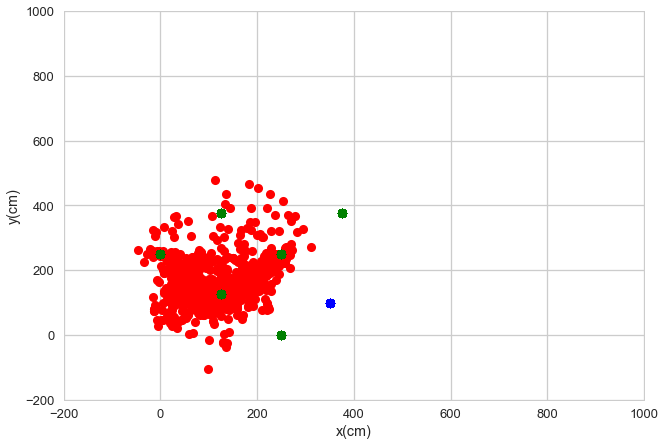

In [42]:
hoge_learn = pd.DataFrame(train_y)
hoge_learn.columns = ["x","y"]
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.xlim([-200,1000])
plt.ylim([-200,1000])
plt.plot(hoge.pred_x,hoge.pred_y,"ro")
plt.plot(hoge.answer_x,hoge.answer_y,"bo")
plt.plot(hoge_learn.x,hoge_learn.y,"go")
plt.savefig("ridge_syn.png")

In [41]:
train_s2.locate.unique()

array([ 1.,  2.,  3.,  5.,  7.,  8.])

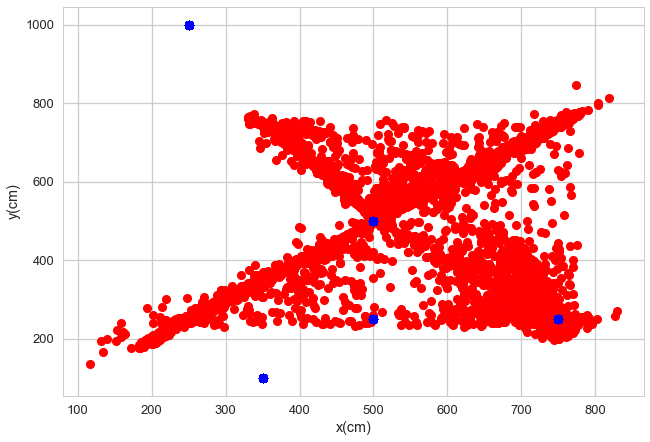

In [62]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge_r.pred_x,hoge_r.pred_y,"ro")
plt.plot(hoge_r.answer_x,hoge_r.answer_y,"bo")
#plt.savefig("ridge3.png")

In [63]:
a = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge_r.pred_x - hoge_r.answer_x)**2 + (hoge_r.pred_y - hoge_r.answer_y)**2).astype(int)
a.sort()
print("誤差100cm未満の精度:%s" % (b[(b < 100)].count()/hoge_r.pred_x.count()))
print("誤差200cm未満の精度:%s" % (b[(b < 200)].count()/hoge_r.pred_x.count()))
print("誤差300cm未満の精度:%s" % (b[(b < 300)].count()/hoge_r.pred_x.count()))
print("誤差400cm未満の精度:%s" % (b[(b < 400)].count()/hoge_r.pred_x.count()))
print("誤差500cm未満の精度:%s" % (b[(b < 500)].count()/hoge_r.pred_x.count()))
print("全体の数:%d" % hoge_r.pred_x.count())

誤差100cm未満の精度:0.0121621621622
誤差200cm未満の精度:0.117267267267
誤差300cm未満の精度:0.318318318318
誤差400cm未満の精度:0.668618618619
誤差500cm未満の精度:0.815315315315
全体の数:6660


### 主成分分析

In [14]:
from sklearn.decomposition import PCA

In [18]:
# 主成分分析する
pca = PCA()
pca.fit(train_x)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(train_x,)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(train_x)